In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVR

attaching new data set 

In [134]:
dataset = pd.read_csv("train.csv")

In [135]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [136]:
dataset.shape

(614, 13)

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [138]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [139]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'] ,  margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

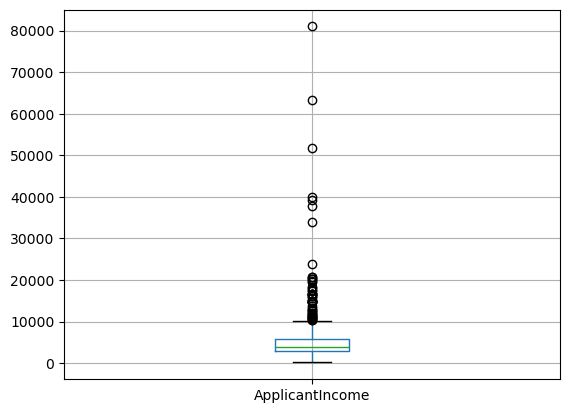

In [140]:
dataset.boxplot(column = 'ApplicantIncome')

<Axes: >

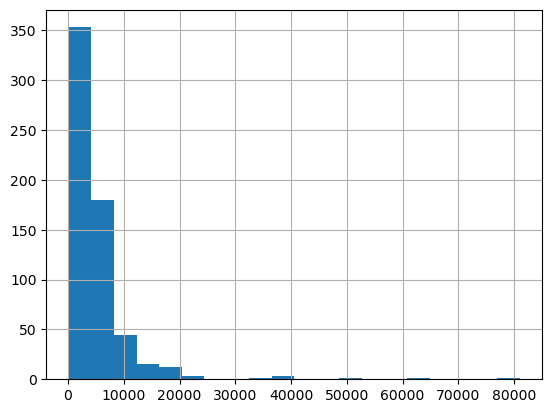

In [141]:
dataset['ApplicantIncome'].hist(bins = 20)

<Axes: >

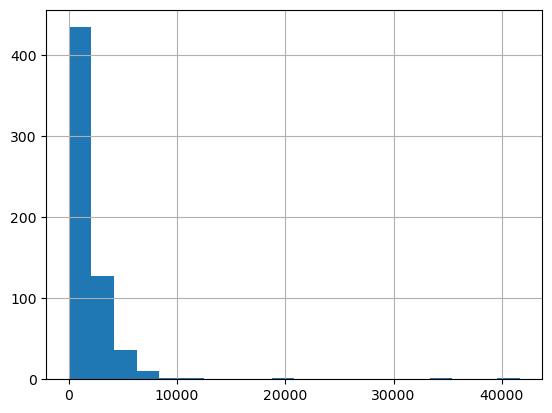

In [142]:
dataset['CoapplicantIncome'].hist(bins =20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

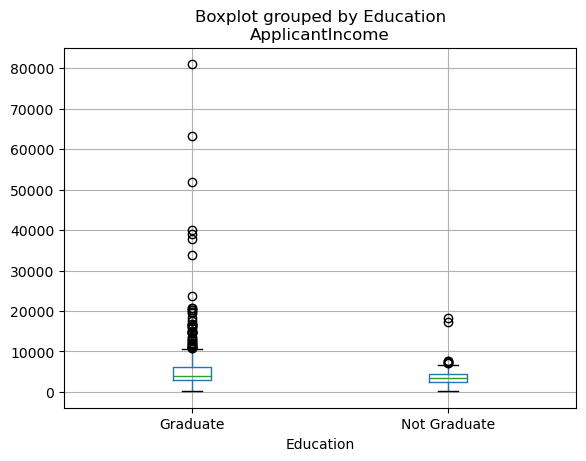

In [143]:
dataset.boxplot(column='ApplicantIncome' , by = 'Education')

<Axes: >

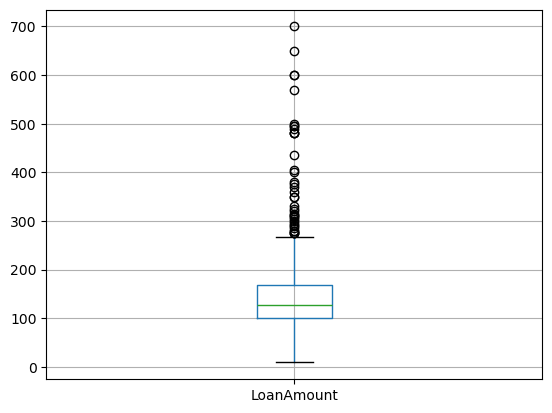

In [144]:
dataset.boxplot(column= 'LoanAmount')

<Axes: >

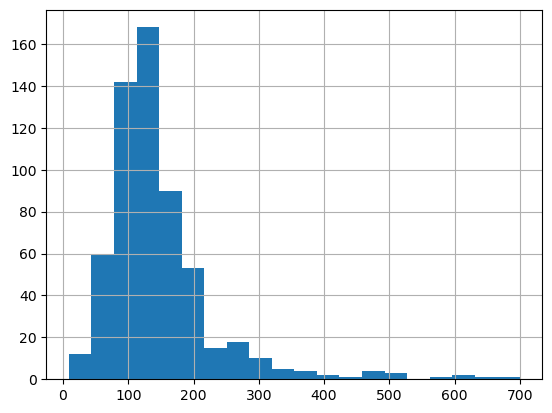

In [145]:
dataset['LoanAmount'].hist(bins=20)

<Axes: >

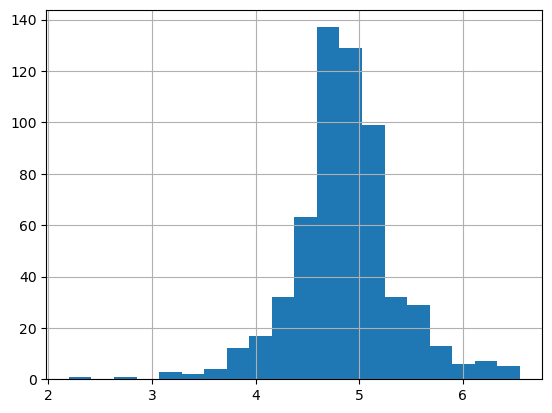

In [146]:
dataset['LoanAmount_log']= np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

In [147]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [148]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace = True)

In [149]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace = True)

In [150]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace = True)

In [151]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace = True)

In [152]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset['LoanAmount'].mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset['LoanAmount_log'].mean())


In [153]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace = True)

In [154]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace = True)

In [155]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [156]:
dataset['TotalIncome']= dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np . log(dataset['TotalIncome'])

<Axes: >

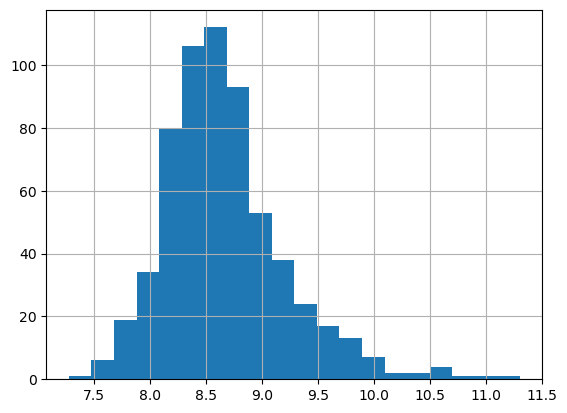

In [157]:
dataset['TotalIncome_log'].hist(bins=20)

In [158]:
dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [159]:
print('per of missing gender is %2f%% ' %((dataset['Gender'].isnull().sum()/dataset.shape[0])*100))

per of missing gender is 0.000000% 


number of people who take loan as group by genger 
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

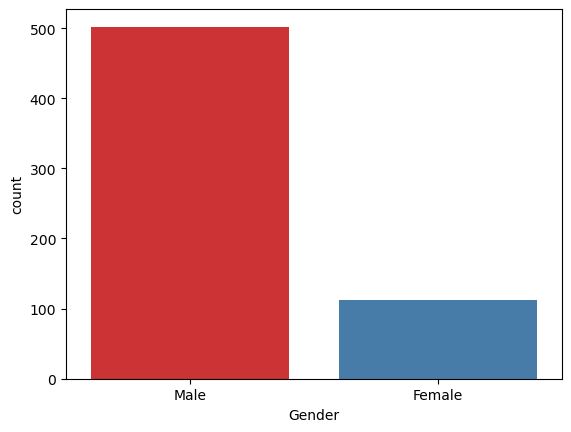

In [189]:
print('number of people who take loan as group by gender ' )
print (dataset['Gender'].value_counts())
sns.countplot(x='Gender',data = dataset , palette = 'Set1')

number of people who take loan as group by marital status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

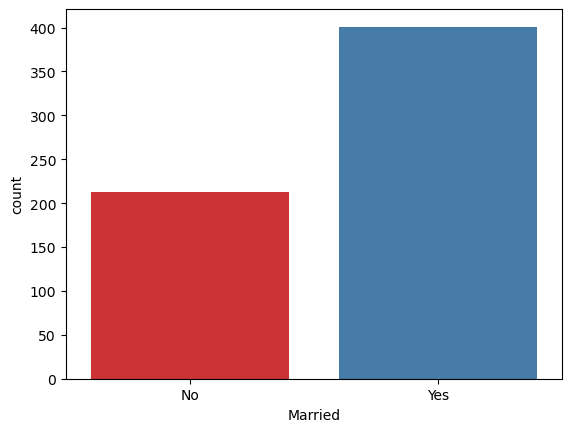

In [193]:
print('number of people who take loan as group by marital status' )
print (dataset['Married'].value_counts())
sns.countplot(x='Married',data = dataset , palette = 'Set1')

number of people who take loan as group by Dependents 
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

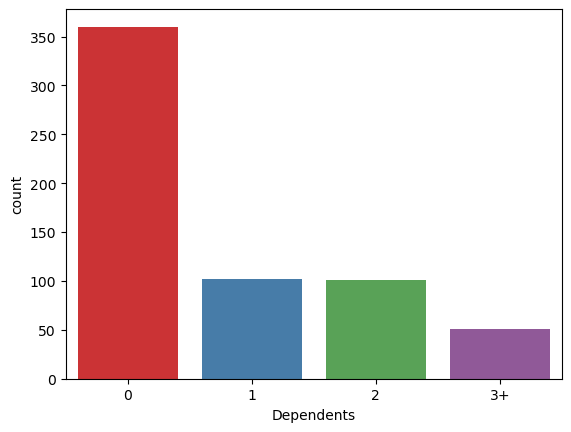

In [199]:
print('number of people who take loan as group by Dependents ' )
print (dataset['Dependents'].value_counts())
sns.countplot(x='Dependents',data = dataset , palette = 'Set1')

number of people who take loan as group by Self_Employed 
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

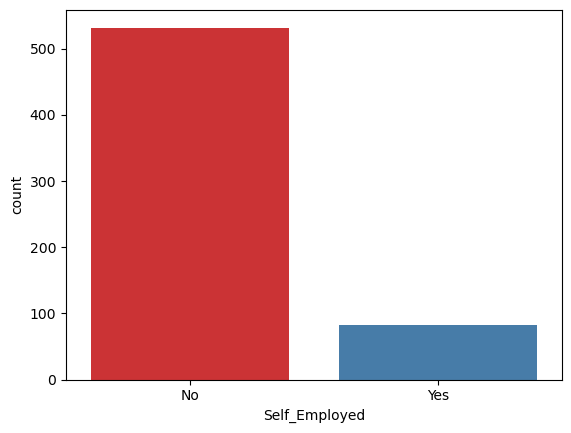

In [201]:
print('number of people who take loan as group by Self_Employed ' )
print (dataset['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data = dataset , palette = 'Set1')

number of people who take loan as group by LoanAmount 
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

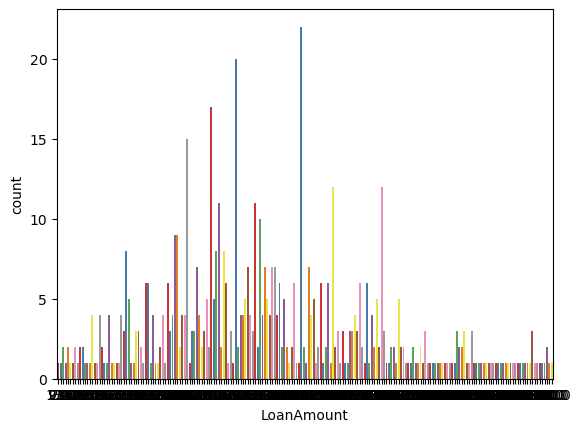

In [203]:
print('number of people who take loan as group by LoanAmount ' )
print (dataset['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data = dataset , palette = 'Set1')

number of people who take loan as group by Credit_History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

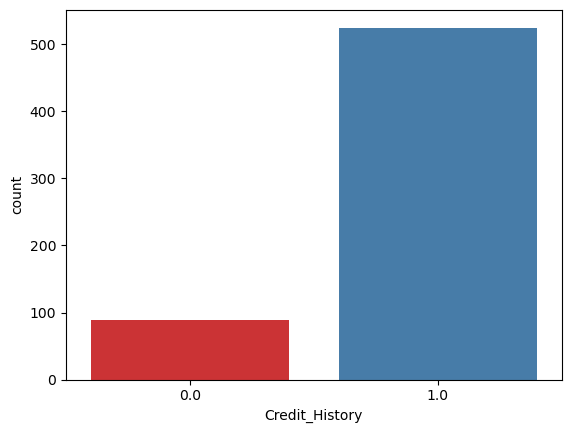

In [205]:
print('number of people who take loan as group by Credit_History' )
print (dataset['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data = dataset , palette = 'Set1')

In [ ]:
x = dataset.iloc[:,np.r_[1:5,9:11,13:15]].values #independent variable
y = dataset.iloc[:, 12].values # dependent variable that is loan status

In [ ]:
x

In [ ]:
y


In [ ]:
print('per of missing gender is %2f%% ' %((dataset['Gender'].isnull().sum()/dataset.shape[0])*100))

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state = 0)

In [ ]:
print(x_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_x = LabelEncoder()

In [ ]:
for i in range (0,5):
    x_train[:,i]= labelencoder_x.fit_transform(x_train[:,i])

In [ ]:
 x_train[:,7]= labelencoder_x.fit_transform(x_train[:,7])

In [ ]:
print(x_train)

In [ ]:
labelencoder_y = LabelEncoder()
y_train= labelencoder_y.fit_transform(y_train)

In [ ]:
print(y_train)

In [ ]:
for i in range (0,5):
    x_test[:,i]= labelencoder_x.fit_transform(x_test[:,i])

In [ ]:
 x_test[:,7]= labelencoder_x.fit_transform(x_test[:,7])

In [ ]:
print(x_test)


In [ ]:
labelencoder_y = LabelEncoder()
y_test= labelencoder_y.fit_transform(y_test)

In [ ]:
print(y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss= StandardScaler()
x_train= ss.fit_transform(x_train)
x_test= ss.fit_transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion = 'entropy' , random_state=0)
DTClassifier.fit(x_train, y_train)

In [ ]:
y_pred= DTClassifier.predict(x_test)
y_pred

In [ ]:
from sklearn import metrics 
print("the accuracy of decision tree is : ", metrics.accuracy_score(y_pred , y_test))

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train, y_train)

In [ ]:
y_pred= NBClassifier.predict(x_test)
y_pred

In [ ]:

print("the accuracy of Navie bayes is : ", metrics.accuracy_score(y_pred , y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

In [ ]:
lr_pred = model.predict(x_test)


In [ ]:
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_pred,y_test))

In [ ]:
print("y_predicted",lr_pred)
print("y_test",y_test)

In [ ]:
from sklearn.model_selection

In [213]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier()
RFClassifier.fit(x_train , y_train)

RandomForestClassifier()

In [215]:
y_pred = RFClassifier.predict(x_test)
print('Random forest  accuracy = ', metrics.accuracy_score(y_pred,y_test))
y_pred

Random forest  accuracy =  0.7723577235772358


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [221]:
from sklearn.neighbors import KNeighborsClassifier
KNClassifier = KNeighborsClassifier()
KNClassifier.fit(x_train , y_train)

KNeighborsClassifier()

In [223]:
y_pred = KNClassifier.predict(x_test)
print('KNeighbors accuracy = ', metrics.accuracy_score(y_pred,y_test))
y_pred

KNeighbors accuracy =  0.7967479674796748


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])